#  Gender Classification
## by:
<p><strong>Sohaib Albakri</strong></p>
         <b>Mashari Almuhanna</b>


## Problem

> Sometimes the police have the witness description of the criminal but they do not know whether he/she is a male or female so they cannot reduce the search area.

## Solution

>In this project, we will develop a classification model to predict the gender of the criminal according to the description we got from the witness. Which will help the police to search for the criminal.

## Dataset 
> The dataset we will use contains the witness description, The data are taken from the [Gender Classification Dataset](https://www.kaggle.com/elakiricoder/gender-classification-dataset). from Kaggle The following table explains the dataset in detail:
dataset in detail:


- long_hair | Integer(0 or 1), indicates whether this person has a long hair or not. <br>

- forehead_width | Integer, width of the forehead from right to left given in cm. forehead_height Integer, width of the forehead width in cm
- nose_wide  | Integer (0 or 1), whether the nose is wide or not  Integer (0 or 1), whether the nose is long or not 
- nose_long  | Integer (0 or 1), whether the nose is long or not
- lips_thin | Integer (0 or 1), whether this person has a thin lip or not 
- distance_nose_to_lip_long  |  Integer (0 or 1), is the distance from - - - nose to lip is long
- gender | String, either Male or Female


## Data Gathring

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import f1_score
import pickle

%matplotlib inline

In [54]:
data = pd.read_csv('4_5969786825252800961.csv')
print(data.shape)
data.head()

(5001, 8)


long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female

In [55]:
df = data.copy()

In [56]:
df.describe()

long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.493901   
std       0.336748           1.107128            0.541268     0.500013   
min       0.000000          11.400000            5.100000     0.000000   
25%       1.000000          12.200000            5.500000     0.000000   
50%       1.000000          13.100000            5.900000     0.000000   
75%       1.000000          14.000000            6.400000     1.000000   
max       1.000000          15.500000            7.100000     1.000000   

         nose_long    lips_thin  distance_nose_to_lip_long  
count  5001.000000  5001.000000                5001.000000  
mean      0.507898     0.493101                   0.498900  
std       0.499988     0.500002                   0.500049  
min       0.000000     0.000000                   0.000000  
25%       0.000000     0.000000                   0.000000  
50%       1.000000     0.000000                   0.000000  
75%       1.000000     1.000000                   1.000000  
max       1.000000     1.000000                   1.000000

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [7]:
df['gender'] = df.gender.replace(to_replace="Male", value=1)
df['gender'] = df.gender.replace(to_replace="Female", value=0)
df = df.astype({'gender': 'int64'})

In [8]:
df

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  distance_nose_to_lip_long  gender  
0             1                          1       1  
1             1                          0       0  
2             1                          1       1  
3             1                          1       1  
4             0                          0       0  
...         ...                        ...     ...  
4996          0                          0       0  
4997          0                          0       0  
4998          0                          0       0  
4999          0                          0       0  
5000          1                          1       1  

[5001 rows x 8 columns]

<AxesSubplot:>

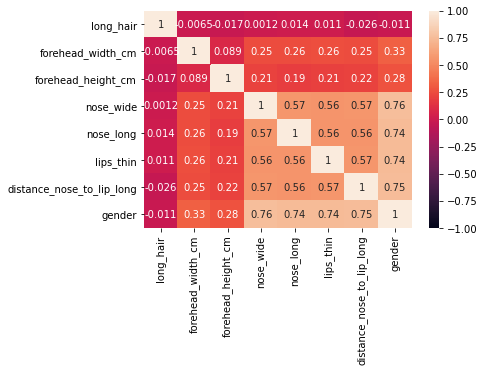

In [9]:
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)

In [10]:
df.gender.value_counts()

0    2501
1    2500
Name: gender, dtype: int64

<AxesSubplot:xlabel='long_hair', ylabel='count'>

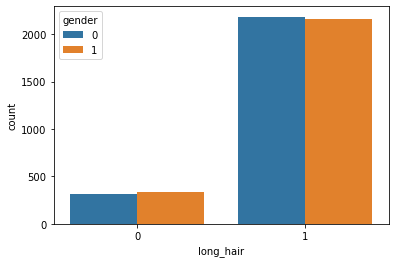

In [38]:
sns.countplot(data=df,x='long_hair' ,hue='gender')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [13]:
X_train.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
4677          1               15.4                 6.6          0          1   
800           1               12.2                 5.2          0          0   
3671          0               11.5                 5.8          0          0   
4193          1               12.7                 5.1          0          0   
2968          1               15.1                 5.6          1          1   

      lips_thin  distance_nose_to_lip_long  
4677          1                          1  
800           0                          0  
3671          0                          0  
4193          0                          0  
2968          1                          1

In [14]:
y_train.head()

4677    1
800     0
3671    0
4193    0
2968    1
Name: gender, dtype: int64

In [15]:
train_df = X_train.copy()
train_df["gender"] = y_train  

In [16]:
train_df.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
4677          1               15.4                 6.6          0          1   
800           1               12.2                 5.2          0          0   
3671          0               11.5                 5.8          0          0   
4193          1               12.7                 5.1          0          0   
2968          1               15.1                 5.6          1          1   

      lips_thin  distance_nose_to_lip_long  gender  
4677          1                          1       1  
800           0                          0       0  
3671          0                          0       0  
4193          0                          0       0  
2968          1                          1       1

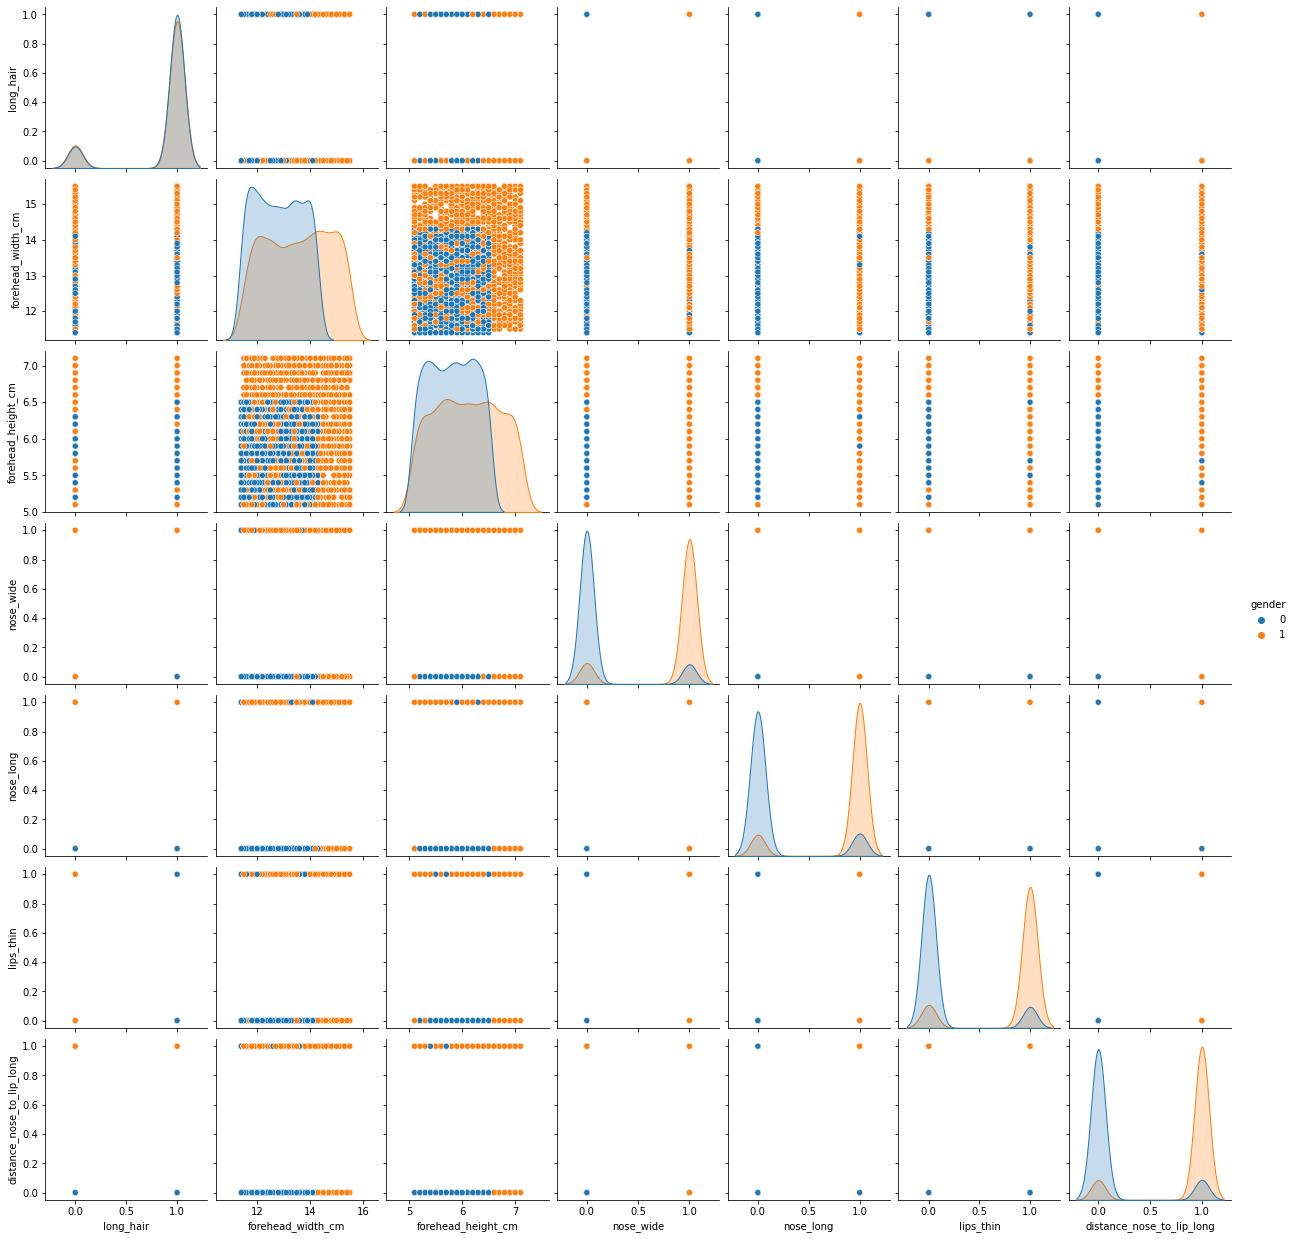

In [17]:
sns.pairplot(train_df, hue="gender")

## Baseline Models

In [18]:
lm2 = LogisticRegression(C=300)
lm2.fit(X_train,y_train)
lm2.score(X_test, y_test)

0.961038961038961

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.961038961038961

In [24]:
randomForest = RandomForestClassifier(n_estimators=1000)
randomForest.fit(X_train,y_train)
randomForest.score(X_test, y_test)

0.961038961038961

## Model Selecting by GridSearchCV

In [124]:
score_results = {}
f1_score_dict = {}

In [132]:
def model_selecting(classifier, parms, X_train, X_test):
    clf = GridSearchCV(classifier, parms, cv = 10, scoring='accuracy')

    clf.fit(X_train, y_train)

    print(f"{type(classifier).__name__} Model best params are: {clf.best_params_} and the best score is {clf.best_score_}")
    print(f"The model got score {clf.score(X_test, y_test)} on testing data")
    score_results[type(classifier).__name__] = clf.score(X_test, y_test)
    f1_score_dict[type(classifier).__name__] = f1_score(y_test, clf.predict(X_test))
    return clf

In [129]:
def confusion_mat(y_test, pred):
    dt_acc = accuracy_score(y_test, pred)
    print(
    classification_report(y_test, pred), sep = '\n\n')
    ax= plt.subplot()
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Female', 'Male']); ax.yaxis.set_ticklabels(['Male', 'Female']);

### LogisticRegression model

LogisticRegression Model best params are: {'C': 1001} and the best score is 0.96975
The model got score 0.961038961038961 on testing data
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



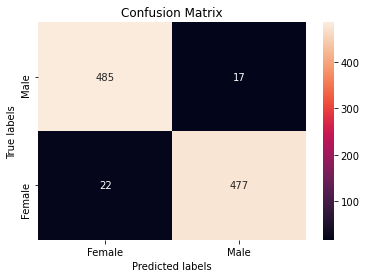

In [133]:
lm3 = LogisticRegression()
params = [{'C': range(1, 10001, 1000)}]
lm3 = model_selecting(lm3, params, X_train, X_test)
confusion_mat(y_test, lm3.predict(X_test))

### KNeighborsClassifier model

KNeighborsClassifier Model best params are: {'n_neighbors': 8} and the best score is 0.9710000000000001
The model got score 0.965034965034965 on testing data
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       502
           1       0.99      0.94      0.96       499

    accuracy                           0.97      1001
   macro avg       0.97      0.96      0.97      1001
weighted avg       0.97      0.97      0.97      1001



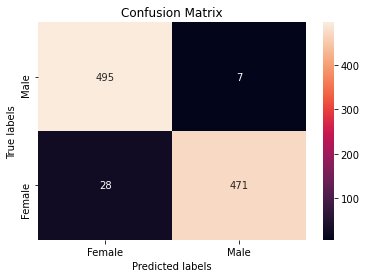

In [134]:
knn = KNeighborsClassifier()
params = [{'n_neighbors': range(1, 10)}]
knn = model_selecting(knn, params, X_train, X_test)
confusion_mat(y_test, knn.predict(X_test))

### RandomForestClassifier model

RandomForestClassifier Model best params are: {'n_estimators': 201} and the best score is 0.97475
The model got score 0.961038961038961 on testing data
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



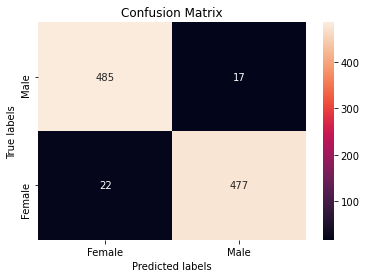

In [135]:
rfc = RandomForestClassifier()
params = [{'n_estimators': list(range(1, 1000, 100))}]
rfc = model_selecting(rfc, params, X_train, X_test)
confusion_mat(y_test, rfc.predict(X_test))

### Support vector machine(SVM) model

SVC Model best params are: {'kernel': 'rbf'} and the best score is 0.9687500000000002
The model got score 0.9630369630369631 on testing data
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



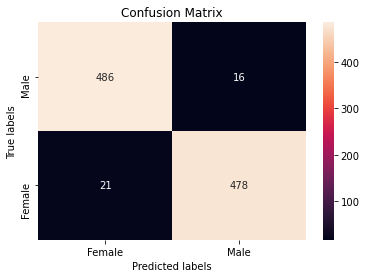

In [136]:
svm_model = svm.SVC()
params = [{"kernel": ["linear", "poly", "rbf", "sigmoid"]}]
svm_model = model_selecting(svm_model, params, X_train, X_test)
confusion_mat(y_test, svm_model.predict(X_test))

### Stacking models 

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       502
           1       0.97      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



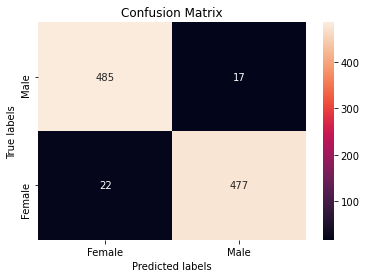

In [137]:
model_vars = [LogisticRegression(C=1001),KNeighborsClassifier(n_neighbors=8),RandomForestClassifier(n_estimators=701),svm.SVC(kernel= 'rbf')]
stacked = StackingClassifier(classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)
stacked.fit(X_train, y_train)
confusion_mat(y_test, stacked.predict(X_test))

## Results

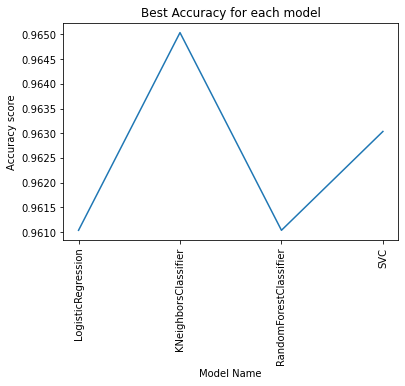

In [138]:
plt.plot(score_results.keys(),score_results.values())
plt.ylabel("Accuracy score")
plt.xlabel("Model Name")
plt.xticks(rotation=90)
plt.title("Best Accuracy for each model");

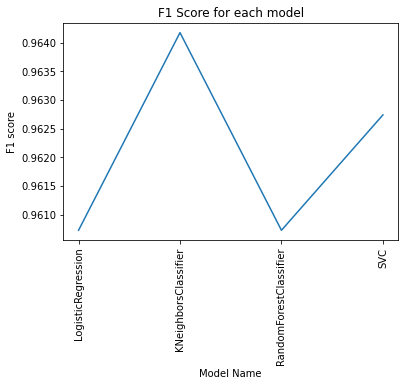

In [139]:
plt.plot(f1_score_dict.keys(),f1_score_dict.values())
plt.ylabel("F1 score")
plt.xlabel("Model Name")
plt.xticks(rotation=90)
plt.title("F1 Score for each model");

## Save Best model 

In [143]:
filename = 'final_ GenderClassification_model.sav'
pickle.dump(knn, open(filename, 'wb'))

## Conclusion 
> We have made 5 models that predicted the gender of criminal after receiving the description from the witness. The model will help the police to reduce the search area. and we have achieve a very good accuracy 97% in the best model! 